In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

In [2]:
## Importe de datos

headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
datos = pd.read_csv("https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/auto.csv", names = headers) 

In [3]:
## Limpieza de datos

datos = datos.replace('?', np.nan)

nor_lss_promedio = datos["normalized-losses"].astype(float).mean(axis=0)
ske_promedio = datos["stroke"].astype(float).mean(axis=0)
bre_promedio = datos["bore"].astype(float).mean(axis=0)
hs_pw_promedio = datos["horsepower"].astype(float).mean(axis=0)
pk_rpm_promedio = datos["peak-rpm"].astype(float).mean(axis=0)

datos["normalized-losses"].replace(np.nan, nor_lss_promedio, inplace = True)
datos["stroke"].replace(np.nan, ske_promedio , inplace = True)
datos["bore"].replace(np.nan, bre_promedio, inplace = True)
datos["horsepower"].replace(np.nan, hs_pw_promedio , inplace = True)
datos["peak-rpm"].replace(np.nan, pk_rpm_promedio , inplace = True)

datos["num-of-doors"].replace(np.nan, "four" , inplace = True)

datos.dropna(subset = ["price"] , axis = 0 , inplace = True)

datos[["bore", "stroke", "price", "peak-rpm"]] = datos[["bore", "stroke", "price", "peak-rpm"]].astype(float)
datos[["normalized-losses"]] = datos[["normalized-losses"]].astype(int)


datos["city-L/100km"] = 235/datos["city-mpg"]  
datos["highway-L/100km"] = 235/datos["highway-mpg"] 

datos["length"] = datos["length"]/datos["length"].max()
datos["width"] = datos["width"]/datos["width"].max()
datos["height"] = datos["height"]/datos["height"].max()

In [4]:
## Bineado de datos
## Trabajaremos con la columna horsepower, veamos qué datos tiene

datos.horsepower.unique()

array(['111', '154', '102', '115', '110', '140', '101', '121', '182',
       '48', '70', '68', '88', '145', '58', '76', '60', '86', '100', '78',
       '90', '176', '262', '135', '84', '64', '120', '72', '123', '155',
       '184', '175', '116', '69', '55', '97', '152', '160', '200', '95',
       '142', '143', '207', 104.25615763546799, '73', '82', '94', '62',
       '56', '112', '92', '161', '156', '52', '85', '114', '162', '134',
       '106'], dtype=object)

In [5]:
## Como vemos son números en su mayoría enteros, sin embargo el tipo de dato es object
## por lo que lo cambiaremos a int

datos.horsepower = datos.horsepower.astype(int)

In [6]:
## Hagamos un describe para los datos

datos.horsepower.describe()

count    201.000000
mean     103.402985
std       37.365650
min       48.000000
25%       70.000000
50%       95.000000
75%      116.000000
max      262.000000
Name: horsepower, dtype: float64

Text(0.5, 1.0, 'horsepower-bins')

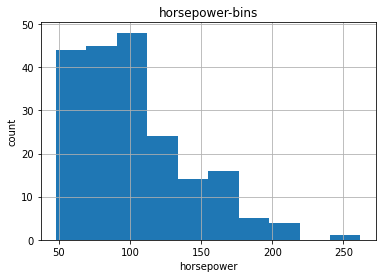

In [7]:
## Hagamos un histograma de los datos

datos.horsepower.hist()
plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("horsepower-bins")

<AxesSubplot:xlabel='horsepower', ylabel='price'>

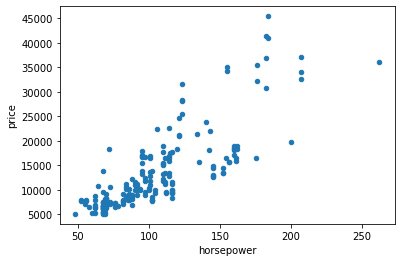

In [8]:
## Hagamos un gráfico de dispersión de los datos

datos.plot(kind = "scatter", x = "horsepower", y = "price")


Text(0.5, 1.0, 'horsepower bineado')

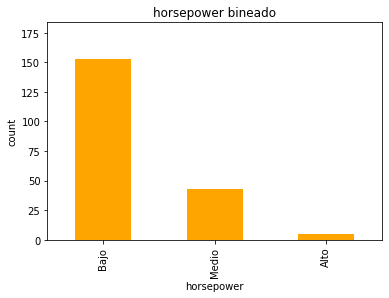

In [10]:
## Separemos los datos en tres bins iguales

bins = np.linspace( datos["horsepower"].min() , datos["horsepower"].max() , 4)  ## Separamos en tres bins
nombre_grupos = ["Bajo", "Medio", "Alto"]               ## Nombres de cada bin

## Agregamos una columna adicional con los datos bineados

datos["horsepower-bineado"] = pd.cut(datos["horsepower"], bins, labels = nombre_grupos, include_lowest=True) 


## Hacemos la gráfica de los datos bineados

## Una forma
datos["horsepower-bineado"].value_counts().plot(kind = "bar", color = "orange")
plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("horsepower bineado")



Text(0.5, 1.0, 'horsepower bineado')

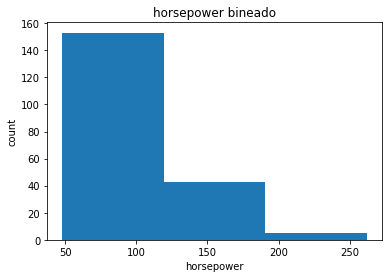

In [13]:
## Otra forma

plt.hist(datos["horsepower"] , bins = 3)
plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("horsepower bineado")
